# Netherlands Rent Properties

dataset from kaggle.  https://www.kaggle.com/juangesino/netherlands-rent-properties

blog post about this notebook is https://medium.com/@togawamanabu/data-on-the-rentals-in-the-netherlands-a202df97be95

## Questions

 1. Which area is most expensive to live?
 1. Compare price and space, what type of property is good value?
 1. Which feature have the greatest impact on price?

In [19]:
!python --version

Python 3.8.8


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

# Data understanding

## Load data 

In [2]:
df = pd.read_json('./dataset/properties.json', lines=True)

## overview of data

In [3]:
df.head()

,_id,externalId,areaRaw,areaSqm,city,coverImageUrl,crawlStatus,crawledAt,datesPublished,firstSeenAt,furnish,lastSeenAt,latitude,longitude,postalCode,postedAgo,propertyType,rawAvailability,rent,rentDetail,rentRaw,source,title,url,additionalCosts,additionalCostsRaw,deposit,depositRaw,descriptionNonTranslated,descriptionNonTranslatedRaw,descriptionTranslated,descriptionTranslatedRaw,detailsCrawledAt,energyLabel,gender,internet,isRoomActive,kitchen,living,matchAge,matchAgeBackup,matchCapacity,matchGender,matchGenderBackup,matchLanguages,matchStatus,matchStatusBackup,pageDescription,pageTitle,pets,registrationCost,registrationCostRaw,roommates,shower,smokingInside,toilet,userDisplayName,userId,userLastLoggedOn,userMemberSince,userPhotoUrl,additionalCostsDescription
0,{'$oid': '5d2b113a43cbfd7c77a998f4'},room-1686123,14 m2,14,Rotterdam,https://resources.kamernet.nl/image/913b4b03-5...,done,{'$date': '2019-07-26T22:18:23.018+0000'},"[{'$date': '2019-07-14T11:25:46.511+0000'}, {'...",{'$date': '2019-07-14T11:25:46.511+0000'},Unfurnished,{'$date': '2019-07-26T22:18:23.142+0000'},51.896601,4.514993,3074HN,4w,Room,26-06-'19 - Indefinite period,500,,"€ 500,-",kamernet,West-Varkenoordseweg,https://kamernet.nl/en/for-rent/room-rotterdam...,50.0,\n € 50\n ...,500.0,\n € 500\n ...,"Nice room for rent, accros the Feyenoord stadi...","\nNice room for rent, accros the Feyenoord sta...","Nice room for rent, accros the Feyenoord stadi...","\nNice room for rent, accros the Feyenoord sta...",{'$date': '2019-07-22T07:10:41.849+0000'},Unknown,Mixed,Yes,true,Shared,None,16 years -\n 99 years,16 years -\n 99 years,1 person,Not important,Not important,Not important,Not important,Not important,"Room for rent in Rotterdam, West-Varkenoordse...",Room for rent in Rotterdam €500 | Kamernet,No,0,\n € 0\n ...,5,Shared,No,Shared,Huize west,4680711.0,21-07-2019,26-06-2019,https://resources.kamernet.nl/Content/images/s...,NaN
1,{'$oid': '5d2b113a43cbfd7c77a9991a'},studio-1691193,30 m2,30,Amsterdam,https://resources.kamernet.nl/image/5e11d6b5-8...,done,{'$date': '2019-08-10T22:28:46.099+0000'},"[{'$date': '2019-07-14T11:25:46.677+0000'}, {'...",{'$date': '2019-07-14T11:25:46.677+0000'},Furnished,{'$date': '2019-08-10T22:28:46.229+0000'},52.370200,4.920721,1018AS,4w,Studio,15-08-'19 - Indefinite period,950,Utilities incl.,"€ 950,- Utilities incl.",kamernet,Parelstraat,https://kamernet.nl/en/for-rent/studio-amsterd...,0.0,\n € 0\n ...,895.0,\n € 895\n ...,"Efficiently furnished, with a large balcony, a...","\nEfficiently furnished, with a large balcony,...","Efficiently furnished, with a large balcony, a...","\nEfficiently furnished, with a large balcony,...",{'$date': '2019-07-22T06:29:33.112+0000'},Unknown,Unknown,Yes,true,Own,Own,18 years -\n 99 years,18 years -\n 99 years,1 person,Not important,Not important,Not important,"Working student, Working","Working student, Working","Studio for rent in Amsterdam, Parelstraat, fo...",Studio for rent in Amsterdam €950 | Kamernet,No,0,\n € 0\n ...,None,Own,No,Own,Cor,1865530.0,20-07-2019,05-01-2012,https://resources.kamernet.nl/Content/images/p...,NaN
2,{'$oid': '5d2b113a43cbfd7c77a99931'},room-1690545,11 m2,11,Amsterdam,https://resources.kamernet.nl/image/74b93a27-a...,done,{'$date': '2019-10-02T22:00:33.141+0000'},"[{'$date': '2019-07-14T11:25:46.834+0000'}, {'...",{'$date': '2019-07-14T11:25:46.834+0000'},Furnished,{'$date': '2019-10-02T22:00:33.264+0000'},52.350880,4.854786,1075SB,09 Jul,Room,01-08-'19 - Indefinite period,1000,Utilities incl.,"€ 1000,- Utilities incl.",kamernet,Zeilstraat,https://kamernet.nl/en/for-rent/room-amsterdam...,NaN,\n -\n ...,1000.0,\n € 1000\n ...,Kamer van 11m2 vlakbij het Vondelpark. Met een...,\nKamer van 11m2 vlakbij het Vondelpark. Met e...,Kamer van 11m2 vlakbij het Vondelpark. Met een...,\nKamer van 11m2 vlakbij het Vondelpark. Met e...,{'$date': '2019-07-21T08:44:32.816+0000'},Unknown,Mixed,Yes,true,Shared,Shared,16 years -\n 93 years,16 years -\n 93 years,1 person,Not important,Not i

In [4]:
#data date check

df['firstSeenAt_str'] = df['firstSeenAt'].astype(str).str.slice(11,21)
pd.to_datetime(df['firstSeenAt_str'], format='%Y-%m-%d')
df.head()

print('max ', df['firstSeenAt_str'].max() , 'min ', df['firstSeenAt_str'].min())

max  2020-03-03 min  2019-07-14


In [92]:
#describe
df.describe()

,areaSqm,latitude,longitude,rent,additionalCosts,deposit,userId
count,46722.000000,46722.000000,46722.000000,46722.000000,14301.000000,27704.000000,4.662200e+04
mean,31.616626,52.201846,5.314911,667.745516,69.648346,713.447083,3.425398e+06
std,29.863150,0.517203,0.798989,416.667339,132.432817,942.256946,1.327936e+06
min,6.000000,50.770041,3.410016,1.000000,0.000000,0.000000,6.240000e+02
25%,14.000000,51.925491,4.711688,395.000000,0.000000,360.000000,2.894253e+06
50%,20.000000,52.162498,5.082988,550.000000,13.000000,500.000000,3.934324e+06
75%,40.000000,52.370420,5.896362,800.000000,99.000000,850.000000,4.515906e+06
max,675.000000,53.434608,7.206637,5999.000000,5000.000000,107514.000000,4.854533e+06


In [5]:
# columns
df.columns

Index(['_id', 'externalId', 'areaRaw', 'areaSqm', 'city', 'coverImageUrl',
       'crawlStatus', 'crawledAt', 'datesPublished', 'firstSeenAt', 'furnish',
       'lastSeenAt', 'latitude', 'longitude', 'postalCode', 'postedAgo',
       'propertyType', 'rawAvailability', 'rent', 'rentDetail', 'rentRaw',
       'source', 'title', 'url', 'additionalCosts', 'additionalCostsRaw',
       'deposit', 'depositRaw', 'descriptionNonTranslated',
       'descriptionNonTranslatedRaw', 'descriptionTranslated',
       'descriptionTranslatedRaw', 'detailsCrawledAt', 'energyLabel', 'gender',
       'internet', 'isRoomActive', 'kitchen', 'living', 'matchAge',
       'matchAgeBackup', 'matchCapacity', 'matchGender', 'matchGenderBackup',
       'matchLanguages', 'matchStatus', 'matchStatusBackup', 'pageDescription',
       'pageTitle', 'pets', 'registrationCost', 'registrationCostRaw',
       'roommates', 'shower', 'smokingInside', 'toilet', 'userDisplayName',
       'userId', 'userLastLoggedOn', 'userMember

# Cleanup Data

In [13]:
### check nan values 
df.isnull().sum() 

_id                                0
externalId                         0
areaRaw                            0
areaSqm                            0
city                               0
coverImageUrl                      0
crawlStatus                        0
crawledAt                          0
datesPublished                     0
firstSeenAt                        0
furnish                            0
lastSeenAt                         0
latitude                           0
longitude                          0
postalCode                         0
postedAgo                          0
propertyType                       0
rawAvailability                    0
rent                               0
rentDetail                         0
rentRaw                            0
source                             0
title                              0
url                                0
additionalCosts                32421
additionalCostsRaw               100
deposit                        19018
d

In [14]:
df.isnull().mean()

_id                            0.000000
externalId                     0.000000
areaRaw                        0.000000
areaSqm                        0.000000
city                           0.000000
coverImageUrl                  0.000000
crawlStatus                    0.000000
crawledAt                      0.000000
datesPublished                 0.000000
firstSeenAt                    0.000000
furnish                        0.000000
lastSeenAt                     0.000000
latitude                       0.000000
longitude                      0.000000
postalCode                     0.000000
postedAgo                      0.000000
propertyType                   0.000000
rawAvailability                0.000000
rent                           0.000000
rentDetail                     0.000000
rentRaw                        0.000000
source                         0.000000
title                          0.000000
url                            0.000000
additionalCosts                0.693913


Drop these two columns as they are 70% and 40% NaN and cannot be used for model building.
**additionalCosts** and **deposit** 

There are a several NaN counts in 100 cases, check what the error is, 

In [6]:
df['crawlStatus'].value_counts()

done           46622
unavailable      100
Name: crawlStatus, dtype: int64

This looks crawl Error and **drop** these rows.

In [15]:
#only succecced data use
sdf = df[df['crawlStatus'] == 'done']

# replace black or unknown to nan
sdf = sdf.replace({'': np.NaN, 'Unknown': np.NaN})

sdf.head()

,_id,externalId,areaRaw,areaSqm,city,coverImageUrl,crawlStatus,crawledAt,datesPublished,firstSeenAt,furnish,lastSeenAt,latitude,longitude,postalCode,postedAgo,propertyType,rawAvailability,rent,rentDetail,rentRaw,source,title,url,additionalCosts,additionalCostsRaw,deposit,depositRaw,descriptionNonTranslated,descriptionNonTranslatedRaw,descriptionTranslated,descriptionTranslatedRaw,detailsCrawledAt,energyLabel,gender,internet,isRoomActive,kitchen,living,matchAge,matchAgeBackup,matchCapacity,matchGender,matchGenderBackup,matchLanguages,matchStatus,matchStatusBackup,pageDescription,pageTitle,pets,registrationCost,registrationCostRaw,roommates,shower,smokingInside,toilet,userDisplayName,userId,userLastLoggedOn,userMemberSince,userPhotoUrl,additionalCostsDescription,firstSeenAt_str
0,{'$oid': '5d2b113a43cbfd7c77a998f4'},room-1686123,14 m2,14,Rotterdam,https://resources.kamernet.nl/image/913b4b03-5...,done,{'$date': '2019-07-26T22:18:23.018+0000'},"[{'$date': '2019-07-14T11:25:46.511+0000'}, {'...",{'$date': '2019-07-14T11:25:46.511+0000'},Unfurnished,{'$date': '2019-07-26T22:18:23.142+0000'},51.896601,4.514993,3074HN,4w,Room,26-06-'19 - Indefinite period,500,NaN,"€ 500,-",kamernet,West-Varkenoordseweg,https://kamernet.nl/en/for-rent/room-rotterdam...,50.0,\n € 50\n ...,500.0,\n € 500\n ...,"Nice room for rent, accros the Feyenoord stadi...","\nNice room for rent, accros the Feyenoord sta...","Nice room for rent, accros the Feyenoord stadi...","\nNice room for rent, accros the Feyenoord sta...",{'$date': '2019-07-22T07:10:41.849+0000'},NaN,Mixed,Yes,true,Shared,None,16 years -\n 99 years,16 years -\n 99 years,1 person,Not important,Not important,Not important,Not important,Not important,"Room for rent in Rotterdam, West-Varkenoordse...",Room for rent in Rotterdam €500 | Kamernet,No,0,\n € 0\n ...,5,Shared,No,Shared,Huize west,4680711.0,21-07-2019,26-06-2019,https://resources.kamernet.nl/Content/images/s...,NaN,2019-07-14
1,{'$oid': '5d2b113a43cbfd7c77a9991a'},studio-1691193,30 m2,30,Amsterdam,https://resources.kamernet.nl/image/5e11d6b5-8...,done,{'$date': '2019-08-10T22:28:46.099+0000'},"[{'$date': '2019-07-14T11:25:46.677+0000'}, {'...",{'$date': '2019-07-14T11:25:46.677+0000'},Furnished,{'$date': '2019-08-10T22:28:46.229+0000'},52.370200,4.920721,1018AS,4w,Studio,15-08-'19 - Indefinite period,950,Utilities incl.,"€ 950,- Utilities incl.",kamernet,Parelstraat,https://kamernet.nl/en/for-rent/studio-amsterd...,0.0,\n € 0\n ...,895.0,\n € 895\n ...,"Efficiently furnished, with a large balcony, a...","\nEfficiently furnished, with a large balcony,...","Efficiently furnished, with a large balcony, a...","\nEfficiently furnished, with a large balcony,...",{'$date': '2019-07-22T06:29:33.112+0000'},NaN,NaN,Yes,true,Own,Own,18 years -\n 99 years,18 years -\n 99 years,1 person,Not important,Not important,Not important,"Working student, Working","Working student, Working","Studio for rent in Amsterdam, Parelstraat, fo...",Studio for rent in Amsterdam €950 | Kamernet,No,0,\n € 0\n ...,None,Own,No,Own,Cor,1865530.0,20-07-2019,05-01-2012,https://resources.kamernet.nl/Content/images/p...,NaN,2019-07-14
2,{'$oid': '5d2b113a43cbfd7c77a99931'},room-1690545,11 m2,11,Amsterdam,https://resources.kamernet.nl/image/74b93a27-a...,done,{'$date': '2019-10-02T22:00:33.141+0000'},"[{'$date': '2019-07-14T11:25:46.834+0000'}, {'...",{'$date': '2019-07-14T11:25:46.834+0000'},Furnished,{'$date': '2019-10-02T22:00:33.264+0000'},52.350880,4.854786,1075SB,09 Jul,Room,01-08-'19 - Indefinite period,1000,Utilities incl.,"€ 1000,- Utilities incl.",kamernet,Zeilstraat,https://kamernet.nl/en/for-rent/room-amsterdam...,NaN,\n -\n ...,1000.0,\n € 1000\n ...,Kamer van 11m2 vlakbij het Vondelpark. Met een...,\nKamer van 11m2 vlakbij het Vondelpark. Met e...,Kamer van 11m2 vlakbij het Vondelpark. Met een...,\nKamer van 11m2 vlakbij het Vondelpark. Met e...,{'$date': '2019-07-21T08:44:32.816+0000'},NaN,Mixed,Yes,true,Shared,Shared,16 years -\n 93 years,16 years -\n 93 years,1 p

In [16]:
sdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46622 entries, 0 to 46721
Data columns (total 63 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   _id                          46622 non-null  object 
 1   externalId                   46622 non-null  object 
 2   areaRaw                      46622 non-null  object 
 3   areaSqm                      46622 non-null  int64  
 4   city                         46622 non-null  object 
 5   coverImageUrl                46622 non-null  object 
 6   crawlStatus                  46622 non-null  object 
 7   crawledAt                    46622 non-null  object 
 8   datesPublished               46622 non-null  object 
 9   firstSeenAt                  46622 non-null  object 
 10  furnish                      46260 non-null  object 
 11  lastSeenAt                   46622 non-null  object 
 12  latitude                     46622 non-null  float64
 13  longitude       

## Add columns

Adding calculated columns.
 - Distance from main cities
 - Rent price / sqm

In [32]:
# check most listed cities
city_count = sdf['city'].value_counts().nlargest(10)
city_count


Amsterdam    8074
Groningen    5070
Rotterdam    4461
Enschede     2297
Den Haag     2183
Utrecht      2178
Eindhoven    1560
Arnhem       1406
Delft        1180
Tilburg      1144
Name: city, dtype: int64

In [38]:
big_cities = list(city_count.index)
big_cities

['Amsterdam',
 'Groningen',
 'Rotterdam',
 'Enschede',
 'Den Haag',
 'Utrecht',
 'Eindhoven',
 'Arnhem',
 'Delft',
 'Tilburg']

In [10]:
# search lat lng city center
# locations of central station from google map


city_centers = {
    'Amsterdam': [52.37823196620491, 4.90070631722754 ],
    'Groningen': [53.21103935678847, 6.564328632593686],
    'Rotterdam': [51.92516380149483, 4.469178720905283],
    'Enschede': [52.222098002567, 6.889267540520442],
    'DenHaag': [52.08118887326885 ,4.324226198186371],
    'Utrecht': [52.08957212194827 ,5.110265847899617],
    'Eindhoven': [51.443677883268066, 5.478788998167003],
    'Arnhem': [51.98402074900218, 5.901175671194085],
    'Delft': [52.007429044630165, 4.355800912103806],
    'Tilburg': [51.56062731924378, 5.081001298170532],
}

In [11]:
# vectorized haversine function
# https://stackoverflow.com/questions/29545704/fast-haversine-approximation-python-pandas/29546836#29546836

def haversine_np(lat1, lon1, lat2, lon2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [12]:
# test 
haversine_np(city_centers['Amsterdam'][0], city_centers['Amsterdam'][1], city_centers['Groningen'][0], city_centers['Groningen'][1])

145.11702446077751

In [13]:
# calclate distance from citiies

#calculate rent / areasqm
sdf['rent_per_areasqm'] = sdf['rent'] / sdf['areaSqm']

for city in city_centers:
    sdf['dist_from_' + city] = haversine_np(sdf['latitude'], sdf['longitude'], city_centers[city][0], city_centers[city][1])
    

    
sdf.head()

,_id,externalId,areaRaw,areaSqm,city,coverImageUrl,crawlStatus,crawledAt,datesPublished,firstSeenAt,furnish,lastSeenAt,latitude,longitude,postalCode,postedAgo,propertyType,rawAvailability,rent,rentDetail,rentRaw,source,title,url,additionalCosts,additionalCostsRaw,deposit,depositRaw,descriptionNonTranslated,descriptionNonTranslatedRaw,descriptionTranslated,descriptionTranslatedRaw,detailsCrawledAt,energyLabel,gender,internet,isRoomActive,kitchen,living,matchAge,matchAgeBackup,matchCapacity,matchGender,matchGenderBackup,matchLanguages,matchStatus,matchStatusBackup,pageDescription,pageTitle,pets,registrationCost,registrationCostRaw,roommates,shower,smokingInside,toilet,userDisplayName,userId,userLastLoggedOn,userMemberSince,userPhotoUrl,additionalCostsDescription,rent_per_areasqm,dist_from_Amsterdam,dist_from_Groningen,dist_from_Rotterdam,dist_from_Enschede,dist_from_DenHaag,dist_from_Utrecht,dist_from_Eindhoven,dist_from_Arnhem,dist_from_Delft,dist_from_Tilburg
0,{'$oid': '5d2b113a43cbfd7c77a998f4'},room-1686123,14 m2,14,Rotterdam,https://resources.kamernet.nl/image/913b4b03-5...,done,{'$date': '2019-07-26T22:18:23.018+0000'},"[{'$date': '2019-07-14T11:25:46.511+0000'}, {'...",{'$date': '2019-07-14T11:25:46.511+0000'},Unfurnished,{'$date': '2019-07-26T22:18:23.142+0000'},51.896601,4.514993,3074HN,4w,Room,26-06-'19 - Indefinite period,500,NaN,"€ 500,-",kamernet,West-Varkenoordseweg,https://kamernet.nl/en/for-rent/room-rotterdam...,50.0,\n € 50\n ...,500.0,\n € 500\n ...,"Nice room for rent, accros the Feyenoord stadi...","\nNice room for rent, accros the Feyenoord sta...","Nice room for rent, accros the Feyenoord stadi...","\nNice room for rent, accros the Feyenoord sta...",{'$date': '2019-07-22T07:10:41.849+0000'},NaN,Mixed,Yes,true,Shared,None,16 years -\n 99 years,16 years -\n 99 years,1 person,Not important,Not important,Not important,Not important,Not important,"Room for rent in Rotterdam, West-Varkenoordse...",Room for rent in Rotterdam €500 | Kamernet,No,0,\n € 0\n ...,5,Shared,No,Shared,Huize west,4680711.0,21-07-2019,26-06-2019,https://resources.kamernet.nl/Content/images/s...,NaN,35.714286,59.637208,201.250465,4.465219,166.196941,24.314172,46.031858,83.337175,95.456832,16.448426,53.959307
1,{'$oid': '5d2b113a43cbfd7c77a9991a'},studio-1691193,30 m2,30,Amsterdam,https://resources.kamernet.nl/image/5e11d6b5-8...,done,{'$date': '2019-08-10T22:28:46.099+0000'},"[{'$date': '2019-07-14T11:25:46.677+0000'}, {'...",{'$date': '2019-07-14T11:25:46.677+0000'},Furnished,{'$date': '2019-08-10T22:28:46.229+0000'},52.370200,4.920721,1018AS,4w,Studio,15-08-'19 - Indefinite period,950,Utilities incl.,"€ 950,- Utilities incl.",kamernet,Parelstraat,https://kamernet.nl/en/for-rent/studio-amsterd...,0.0,\n € 0\n ...,895.0,\n € 895\n ...,"Efficiently furnished, with a large balcony, a...","\nEfficiently furnished, with a large balcony,...","Efficiently furnished, with a large balcony, a...","\nEfficiently furnished, with a large balcony,...",{'$date': '2019-07-22T06:29:33.112+0000'},NaN,NaN,Yes,true,Own,Own,18 years -\n 99 years,18 years -\n 99 years,1 person,Not important,Not important,Not important,"Working student, Working","Working student, Working","Studio for rent in Amsterdam, Parelstraat, fo...",Studio for rent in Amsterdam €950 | Kamernet,No,0,\n € 0\n ...,None,Own,No,Own,Cor,1865530.0,20-07-2019,05-01-2012,https://resources.kamernet.nl/Content/images/p...,NaN,31.666667,1.624923,144.666405,58.256222,134.790383,51.769372,33.748011,109.837850,79.406393,55.733945,90.630650
2,{'$oid': '5d2b113a43cbfd7c77a99931'},room-1690545,11 m2,11,Amsterdam,https://resources.kamernet.nl/image/74b93a27-a...,done,{'$date': '2019-10-02T22:00:33.141+0000'},"[{'$date': '2019-07-14T11:25:46.834+0000'}, {'...",{'$date': '2019-07-14T11:25:46.834+0000'},Furnished,{'$date': '2019-10-02T22:00:33.264+0000'},52.350880,4.854786,1075SB,09 Jul,Room,01-08-'19 - Indefinite period,1000,Utilities incl.,"€ 1000,- Utilities incl.",kamernet,Zeilstraat,https://kamernet.nl/en

## Most expensive / cheap rent and rent_per_area  by city

In [14]:
rent_by_city = sdf.groupby('city').agg(count=('_id', 'size'), rent=('rent', 'mean'), rent_per_areasqm=('rent_per_areasqm', 'mean')).sort_values('rent', ascending=False)
rent_by_city

,count,rent,rent_per_areasqm
city,,,
Mantinge,1,5000.000000,833.333333
Wapenveld,1,5000.000000,16.666667
Markelo,2,3500.000000,13.358779
Groet,1,2500.000000,17.857143
Nuland,1,2500.000000,12.500000
Loosdrecht,7,2134.285714,24.906463
amsterdam,1,2100.000000,32.307692
Bleiswijk,5,2046.000000,19.517909
Vreeland,12,1987.500000,17.313272


In [61]:
big_cities_df = sdf[sdf['city'].isin(big_cities)]
rent_city_property_type = big_cities_df.groupby(['city', 'propertyType']).agg(count=('_id', 'size'), rent=('rent', 'mean'), rent_per_areasqm=('rent_per_areasqm', 'mean'))
rent_city_property_type

count         rent  rent_per_areasqm
city      propertyType                                           
Amsterdam Anti-squat             3   395.000000         17.626756
          Apartment           2287  1585.908177         24.974497
          Room                5189   694.534400         50.637405
          Student residence      1   550.000000         36.666667
          Studio               594  1016.388889         37.015657
Arnhem    Apartment            424   787.158019         15.529949
          Room                 882   399.608844         25.421503
          Studio               100   630.490000         22.407453
Delft     Anti-squat             4   304.000000          7.385634
          Apartment             42   875.047619         17.965598
          Room                1089   385.079890         26.906001
          Student residence      1   395.000000         32.916667
          Studio                44   585.500000         21.165414
Den Haag  Anti-squat             4  1902.250000        261.755952
          Apartment            614  1249.721498         18.242079
          Room                1430   516.519580         33.775473
          Studio               135   673.051852         24.042121
Eindhoven Anti-squat             4   391.000000          8.033333
          Apartment            557  1148.389587         17.465269
          Room                 794   417.525189         28.692063
          Studio               205   672.541463         24.985316
Enschede  Anti-squat             1   380.000000          6.333333
          Apartment            375   888.184000         14.421846
          Room                1812   328.421634         23.132734
          Studio               109   625.403670         21.539475
Groningen Anti-squat             4   338.500000          7.010149
          Apartment           1079   947.711770         18.270529
          Room                3474   383.725676         24.746442
          Student residence      1   210.000000         21.000000
          Studio               512   658.048828         24.266325
Rotterdam Anti-squat             9   450.333333         20.939274
          Apartment           1156  1098.502595         17.045370
          Room                2914   535.059369         34.095378
          Studio               382   743.282723         27.083445
Tilburg   Anti-squat             1  1200.000000         11.538462
          Apartment            306   856.238562         16.828657
          Room                 640   394.278125         24.507056
          Studio               197   599.741117         22.826078
Utrecht   Anti-squat             1   312.000000         34.666667
          Apartment            594  1129.713805         20.181305
          Room                1298   526.862866         34.195894
          Studio               285   789.901754         30.085058

In [66]:
big_cities_without_sr_aq = big_cities_df[~big_cities_df.propertyType.isin(['Student residence', 'Anti-squat'])]
big_cities_without_sr_aq_city_property_type= big_cities_without_sr_aq.groupby(['city', 'propertyType']).agg(count=('_id', 'size'), rent=('rent', 'mean'), rent_per_areasqm=('rent_per_areasqm', 'mean'))
big_cities_without_sr_aq_city_property_type

count         rent  rent_per_areasqm
city      propertyType                                      
Amsterdam Apartment      2287  1585.908177         24.974497
          Room           5189   694.534400         50.637405
          Studio          594  1016.388889         37.015657
Arnhem    Apartment       424   787.158019         15.529949
          Room            882   399.608844         25.421503
          Studio          100   630.490000         22.407453
Delft     Apartment        42   875.047619         17.965598
          Room           1089   385.079890         26.906001
          Studio           44   585.500000         21.165414
Den Haag  Apartment       614  1249.721498         18.242079
          Room           1430   516.519580         33.775473
          Studio          135   673.051852         24.042121
Eindhoven Apartment       557  1148.389587         17.465269
          Room            794   417.525189         28.692063
          Studio          205   672.541463         24.985316
Enschede  Apartment       375   888.184000         14.421846
          Room           1812   328.421634         23.132734
          Studio          109   625.403670         21.539475
Groningen Apartment      1079   947.711770         18.270529
          Room           3474   383.725676         24.746442
          Studio          512   658.048828         24.266325
Rotterdam Apartment      1156  1098.502595         17.045370
          Room           2914   535.059369         34.095378
          Studio          382   743.282723         27.083445
Tilburg   Apartment       306   856.238562         16.828657
          Room            640   394.278125         24.507056
          Studio          197   599.741117         22.826078
Utrecht   Apartment       594  1129.713805         20.181305
          Room           1298   526.862866         34.195894
          Studio          285   789.901754         30.085058

<AxesSubplot:title={'center':'Avarage Rent by City and Property type'}, xlabel='city', ylabel='Rent(€)'>

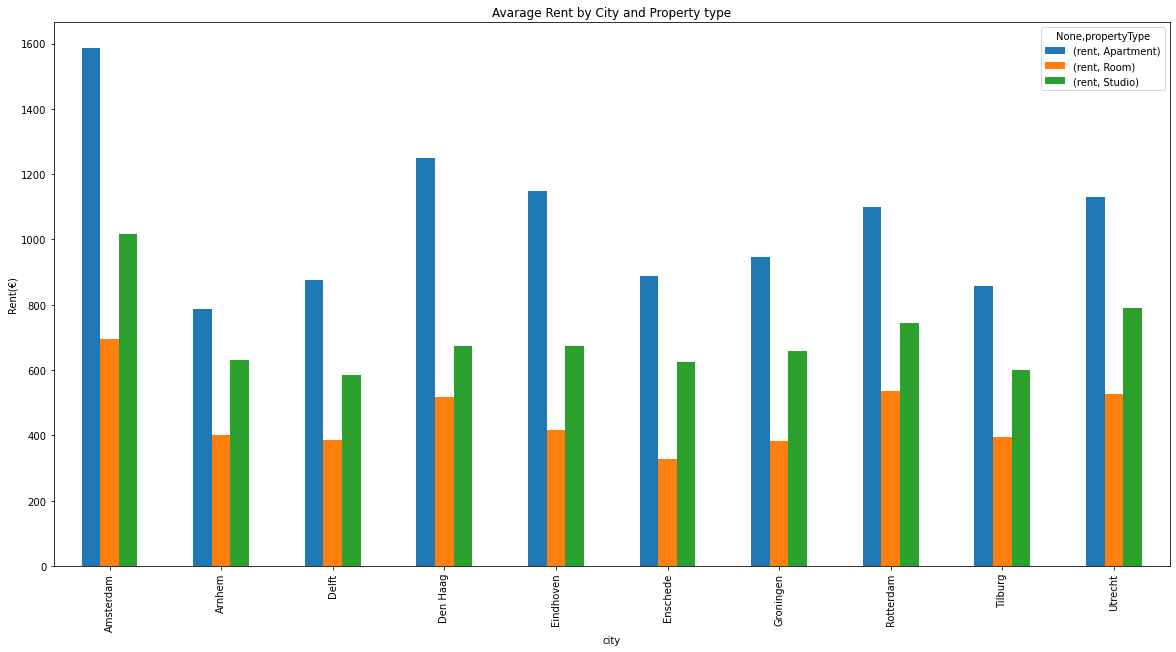

In [63]:
big_cities_without_sr_aq_city_property_type.unstack().plot(kind='bar', y=['rent'], figsize=(20,10), ylabel='Rent(€)', title='Avarage Rent by City and Property type')

<AxesSubplot:title={'center':'Avarage Rent/sq2 by City and Property type'}, xlabel='city', ylabel='Rent/sq2(€)'>

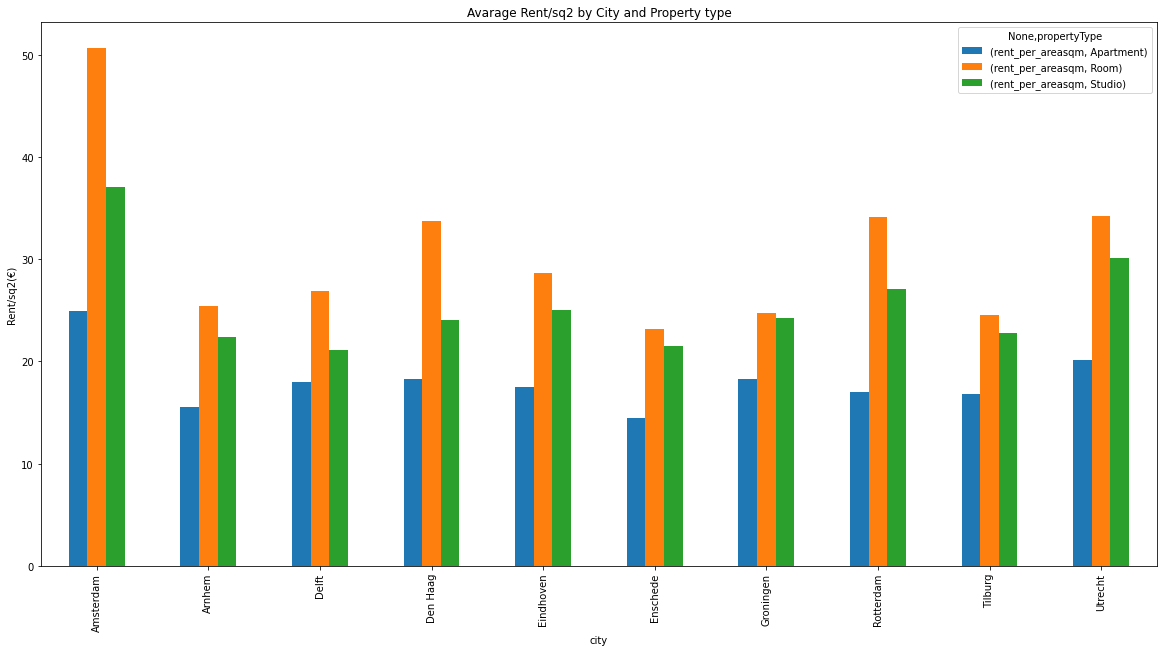

In [65]:
big_cities_without_sr_aq_city_property_type.unstack().plot(kind='bar', y=['rent_per_areasqm'], figsize=(20,10), ylabel='Rent/sq2(€)', title='Avarage Rent/sq2 by City and Property type')

From these table and chart, 

If you want to live in an apartment, Amsterdam is the most expensive city with an average of 1600€/month, followed by Den Haag at 1250€/m and Enschede, Rotterdam and utrecht at around 1100€/m.
For a room, 700€/m in Amsterdam, but the price per square meter will be the highest at 50€/m.
Size is one of big factor in the rent price.

### key columns

In [15]:
key_columns = [
    'areaSqm', 
#     'city', 
    'furnish', 
    'propertyType', 
    'rent', 
#    'additionalCosts', 
#    'deposit', 
#    'energyLabel', 
    'internet', 
    'kitchen', 
    'living',
    'matchCapacity', 
    'pets',
    'smokingInside',
]

for city in city_centers:
    key_columns.append('dist_from_' + city)

key_columns.append('rent_per_areasqm')

key_columns

['areaSqm',
 'furnish',
 'propertyType',
 'rent',
 'internet',
 'kitchen',
 'living',
 'matchCapacity',
 'pets',
 'smokingInside',
 'dist_from_Amsterdam',
 'dist_from_Groningen',
 'dist_from_Rotterdam',
 'dist_from_Enschede',
 'dist_from_DenHaag',
 'dist_from_Utrecht',
 'dist_from_Eindhoven',
 'dist_from_Arnhem',
 'dist_from_Delft',
 'dist_from_Tilburg',
 'rent_per_areasqm']

In [16]:
kdf = sdf[key_columns]
kdf.head()

,areaSqm,furnish,propertyType,rent,internet,kitchen,living,matchCapacity,pets,smokingInside,dist_from_Amsterdam,dist_from_Groningen,dist_from_Rotterdam,dist_from_Enschede,dist_from_DenHaag,dist_from_Utrecht,dist_from_Eindhoven,dist_from_Arnhem,dist_from_Delft,dist_from_Tilburg,rent_per_areasqm
0,14,Unfurnished,Room,500,Yes,Shared,None,1 person,No,No,59.637208,201.250465,4.465219,166.196941,24.314172,46.031858,83.337175,95.456832,16.448426,53.959307,35.714286
1,30,Furnished,Studio,950,Yes,Own,Own,1 person,No,No,1.624923,144.666405,58.256222,134.790383,51.769372,33.748011,109.837850,79.406393,55.733945,90.630650,31.666667
2,11,Furnished,Room,1000,Yes,Shared,Shared,1 person,Yes,Yes,4.352933,149.459721,54.126682,139.031203,46.936372,33.848170,109.516849,82.149140,51.114793,89.172799,90.909091
3,16,Unfurnished,Room,290,Yes,Shared,None,1 person,No,Yes,132.230968,21.953365,186.211090,90.689366,183.236695,141.946528,189.355153,122.799328,186.380767,190.220521,18.125000
4,22,Unfurnished,Room,475,NaN,Own,Own,1 person,No,No,57.210630,199.974032,1.120927,167.664778,19.616407,46.510057,87.703769,97.503210,11.858820,58.501428,21.590909


In [17]:
## top 10 of highest and lowest rent properties

# top10
top_10 = kdf.sort_values('rent', ascending=False)
top_10.head(100)

,areaSqm,furnish,propertyType,rent,internet,kitchen,living,matchCapacity,pets,smokingInside,dist_from_Amsterdam,dist_from_Groningen,dist_from_Rotterdam,dist_from_Enschede,dist_from_DenHaag,dist_from_Utrecht,dist_from_Eindhoven,dist_from_Arnhem,dist_from_Delft,dist_from_Tilburg,rent_per_areasqm
7829,22,Unfurnished,Room,5999,No,Own,None,1 person,No,No,54.359914,198.887040,9.988895,172.178489,10.000197,50.065485,97.153995,103.291067,2.558410,68.143539,272.681818
14770,6,Uncarpeted,Anti-squat,5999,NaN,NaN,NaN,1 person,By mutual agreement,Not important,51.379566,196.371074,23.710448,177.708110,3.784591,56.114852,110.154342,111.048560,12.012755,81.552202,999.833333
31590,22,Uncarpeted,Room,5999,NaN,NaN,NaN,Not important,By mutual agreement,Not important,54.359914,198.887040,9.988895,172.178489,10.000197,50.065485,97.153995,103.291067,2.558410,68.143539,272.681818
36620,290,Uncarpeted,Apartment,5700,NaN,Shared,Shared,> 5 persons,No,Not important,60.730243,203.424726,2.417044,170.141300,21.343690,49.419468,87.426635,99.621691,13.060479,57.840658,19.655172
11551,300,Unfurnished,Apartment,5000,NaN,NaN,NaN,2 persons,No,No,79.530090,92.078099,123.059253,60.610916,125.177895,75.890286,117.697623,51.759867,126.111993,118.684190,16.666667
1450,120,Furnished,Apartment,5000,Yes,Own,Own,1 person,No,No,1.670264,146.557281,56.677384,136.613050,49.851289,33.906318,109.885741,80.666004,53.926564,90.205051,41.666667
3704,200,Furnished,Apartment,5000,NaN,NaN,NaN,2 persons,By mutual agreement,Not important,17.624740,137.777116,63.383518,119.336418,61.606314,25.563974,99.965668,63.777181,63.760393,84.356373,25.000000
8594,200,Unfurnished,Apartment,5000,NaN,NaN,NaN,2 persons,No,No,53.033394,198.100316,22.013839,178.285527,2.856473,56.455287,108.937099,111.176651,10.125384,80.133062,25.000000
17288,6,Unfurnished,Room,5000,NaN,NaN,NaN,1 person,By mutual agreement,Not important,123.554565,46.351421,173.762733,66.584995,173.203196,127.616693,168.397707,101.692256,175.356421,171.689760,833.333333
43118,210,Unfurnished,Apartment,4950,NaN,NaN,NaN,Not important,No,No,59.637208,201.250465,4.465219,166.196941,24.314172,46.031858,83.337175,95.456832,16.448426,53.959307,23.571429


In [18]:
bottom_10 = kdf.sort_values('rent', ascending=True)
bottom_10.head(100)

,areaSqm,furnish,propertyType,rent,internet,kitchen,living,matchCapacity,pets,smokingInside,dist_from_Amsterdam,dist_from_Groningen,dist_from_Rotterdam,dist_from_Enschede,dist_from_DenHaag,dist_from_Utrecht,dist_from_Eindhoven,dist_from_Arnhem,dist_from_Delft,dist_from_Tilburg,rent_per_areasqm
607,12,Furnished,Room,1,Yes,Shared,None,> 5 persons,No,No,89.048049,159.099307,96.619621,81.354260,109.204975,58.892422,51.962043,15.828323,105.465422,62.821863,0.083333
928,20,Furnished,Room,1,Yes,Shared,Own,1 person,Yes,No,40.033906,152.013825,57.408738,111.818973,64.071888,10.395529,73.793472,45.348006,62.695040,60.575042,0.050000
1682,12,Uncarpeted,Room,1,Yes,Shared,Shared,1 person,No,No,69.331091,151.337942,81.819956,88.550629,92.389901,40.205430,59.220011,16.521024,89.515949,60.077929,0.083333
704,8,Furnished,Room,1,NaN,NaN,NaN,1 person,No,No,14.526695,158.731974,43.800836,142.275585,38.173159,28.651529,102.308124,81.320485,41.504162,80.417428,0.125000
2903,10,Unfurnished,Room,1,Yes,Shared,Shared,1 person,No,No,69.260216,150.950341,82.038530,88.248532,92.541344,40.280569,59.590374,16.277853,89.698410,60.462532,0.100000
5284,10,Furnished,Room,1,Yes,Shared,Shared,1 person,Yes,No,52.450076,197.566906,19.562616,176.426410,1.197338,54.456308,106.362295,109.009609,7.818359,77.586788,0.100000
21030,25,Unfurnished,Room,1,Yes,Shared,Own,1 person,Yes,No,64.228245,145.480537,81.481771,87.431414,90.682586,37.434304,65.737952,17.916093,88.413032,64.751653,0.040000
7637,14,Furnished,Room,1,Yes,Shared,Shared,1 person,No,Yes,69.171576,151.230551,81.748183,88.575056,92.289473,40.078920,59.350851,16.579666,89.427981,60.137954,0.071429
5765,10,Uncarpeted,Room,1,NaN,NaN,NaN,1 person,No,No,69.577845,151.184650,82.166852,88.217984,92.729855,40.524112,59.312337,16.175360,89.860642,60.322955,0.100000
22154,15,Unfurnished,Room,1,Yes,Shared,None,1 person,Yes,Yes,87.288482,161.899287,92.818103,85.657575,105.769952,56.230580,48.500418,18.393531,101.847589,58.502661,0.066667


Looks like 1euro / month or 6000 euro / month is not proper price, so remove outliners.

In [19]:

## Remove outliners

kdf = kdf[kdf['rent'] > 100]  
kdf = kdf[kdf['rent'] < 5000]

Text(0.5, 1.0, 'Rental price and area')

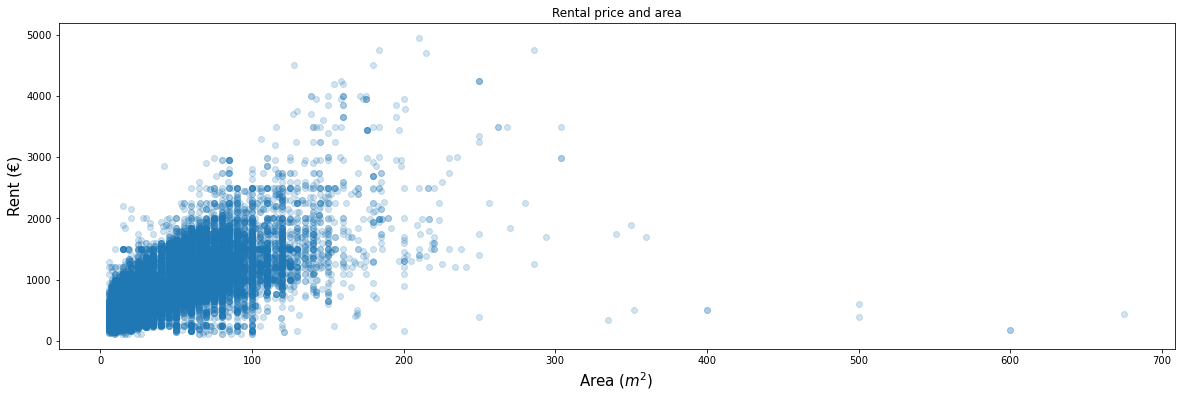

In [20]:
fig, ax1 = plt.subplots(1, 1, figsize=(20,6))

ax1.scatter(kdf['areaSqm'], kdf['rent'], alpha=0.2)
ax1.set_xlabel(r'Area $(m^2)$', fontsize=15)
ax1.set_ylabel(r'Rent (€)', fontsize=15)
ax1.set_title('Rental price and area')


Text(0.5, 1.0, 'Rental price and distance from Amsteldam')

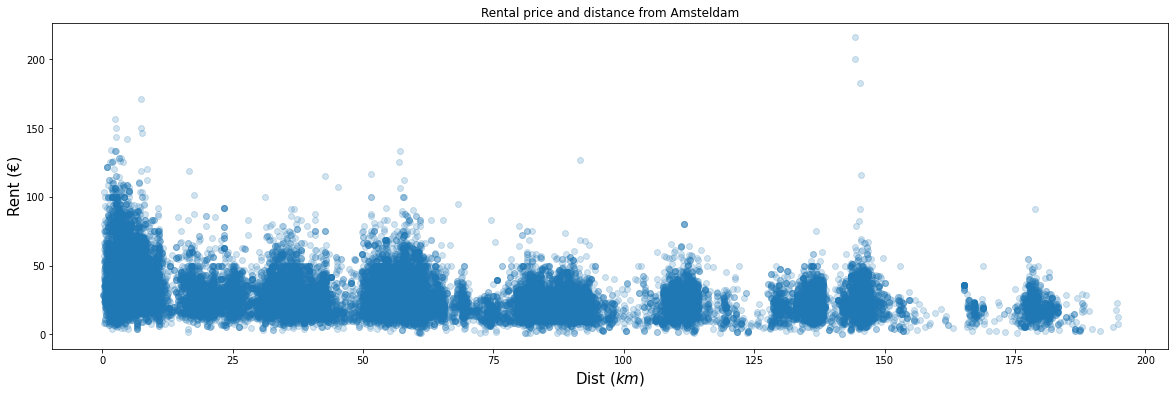

In [21]:
fig, ax2 = plt.subplots(1, 1, figsize=(20,6))

ax2.scatter(kdf['dist_from_Amsterdam'], kdf['rent_per_areasqm'], alpha=0.2)
ax2.set_xlabel(r'Dist $(km)$', fontsize=15)
ax2.set_ylabel(r'Rent (€)', fontsize=15)
ax2.set_title('Rental price and distance from Amsteldam')

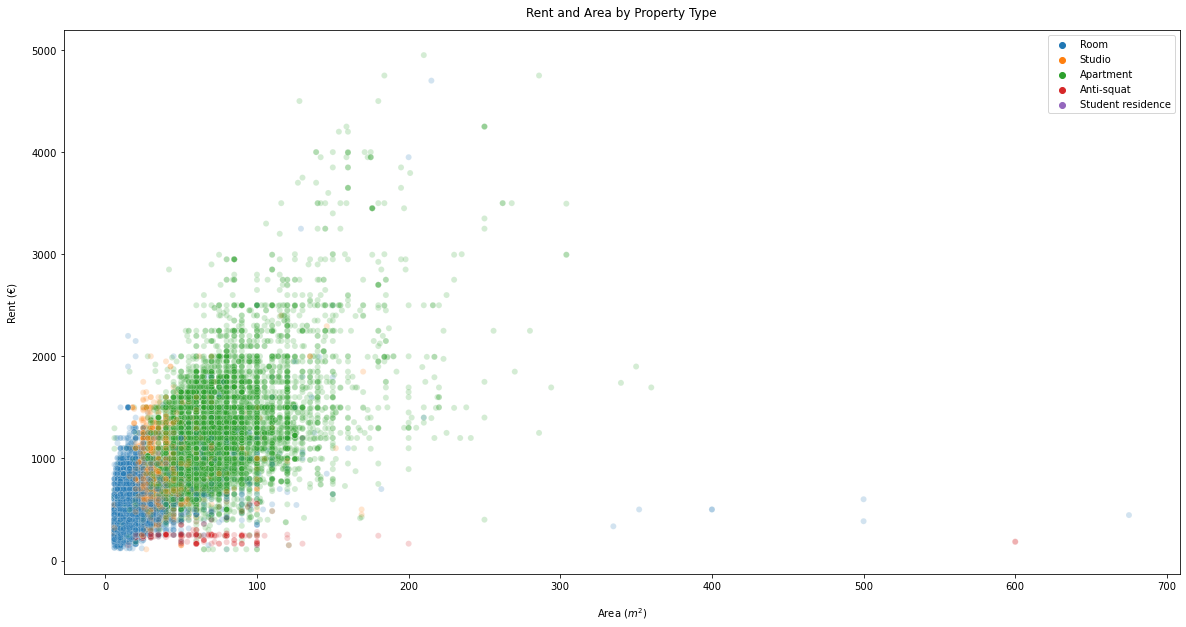

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

sns.scatterplot(x="areaSqm", y="rent", data=kdf, hue="propertyType",alpha=0.2)
ax.set_ylabel("Rent (€)", labelpad=14)
ax.set_xlabel("Area $(m^2)$", labelpad=14)
ax.set_title("Rent and Area by Property Type", pad=14)
legend = ax.legend()

plt.show()

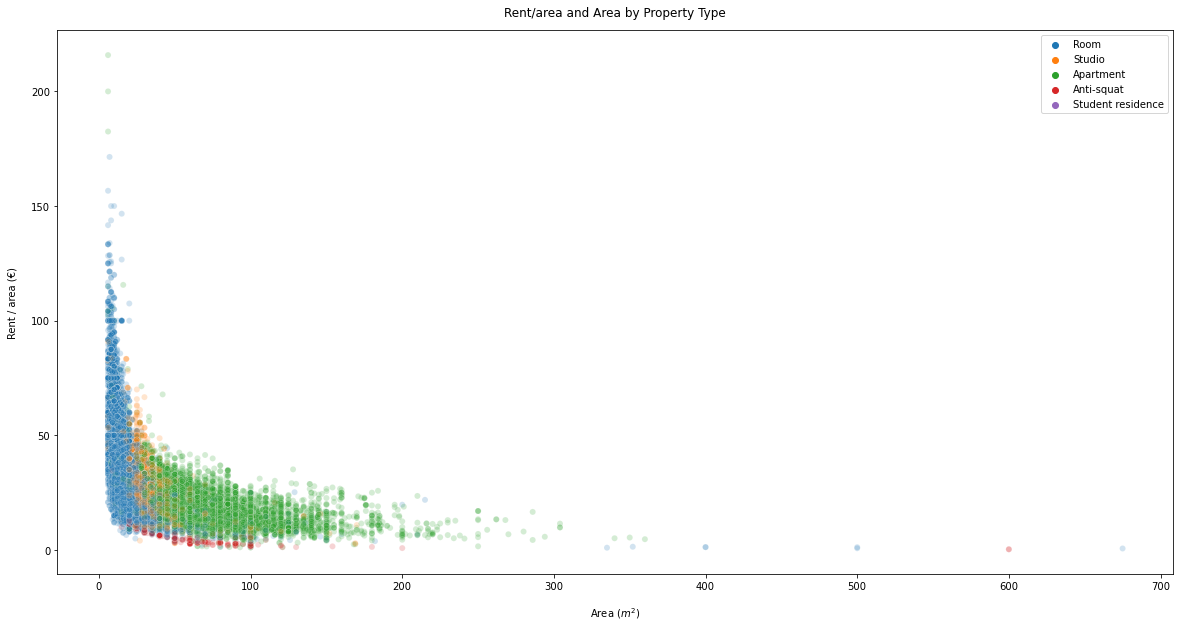

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

sns.scatterplot(x="areaSqm", y="rent_per_areasqm", data=kdf, hue="propertyType",alpha=0.2)
ax.set_ylabel("Rent / area (€)", labelpad=14)
ax.set_xlabel("Area $(m^2)$", labelpad=14)
ax.set_title("Rent/area and Area by Property Type", pad=14)
legend = ax.legend()

plt.show()

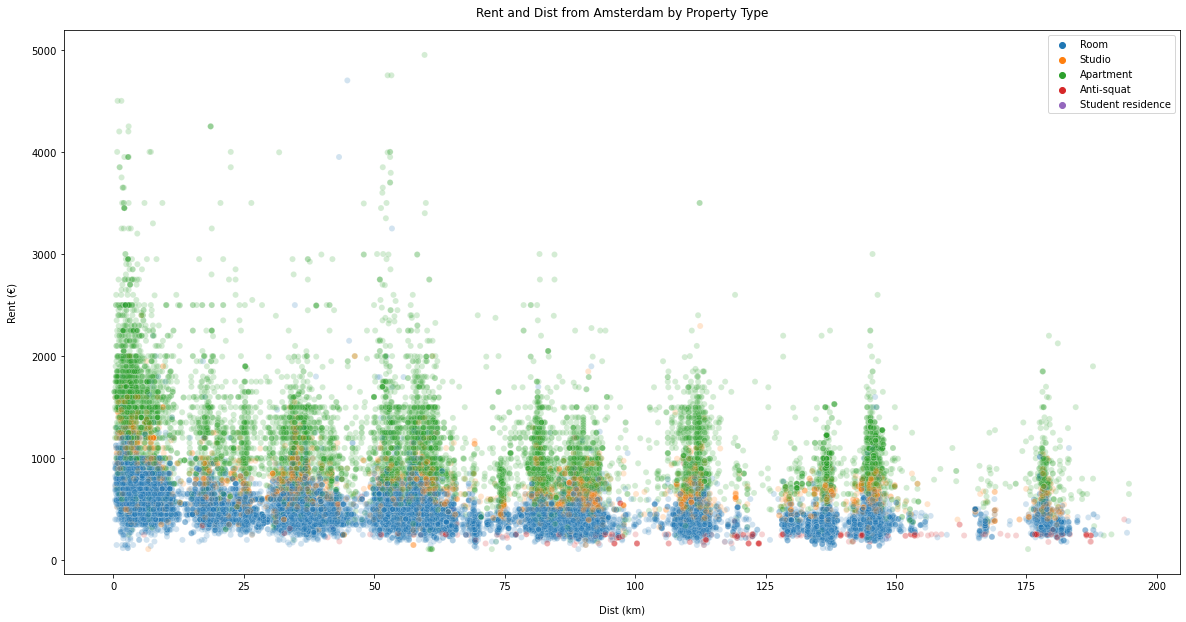

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

sns.scatterplot(y="rent", x="dist_from_Amsterdam", data=kdf, hue="propertyType",alpha=0.2)
ax.set_ylabel("Rent (€)", labelpad=14)
ax.set_xlabel("Dist (km)", labelpad=14)
ax.set_title("Rent and Dist from Amsterdam by Property Type", pad=14)
legend = ax.legend()

plt.show()

### Column for nearest bigger city


In [25]:
kdf['dist_from_nearest_city'] = kdf[[ 
    'dist_from_Amsterdam',
    'dist_from_Groningen',
    'dist_from_Rotterdam',
    'dist_from_Enschede',
    'dist_from_DenHaag',
    'dist_from_Utrecht',
    'dist_from_Eindhoven',
    'dist_from_Arnhem',
    'dist_from_Delft',
    'dist_from_Tilburg',]].min(axis=1)

kdf.head()

,areaSqm,furnish,propertyType,rent,internet,kitchen,living,matchCapacity,pets,smokingInside,dist_from_Amsterdam,dist_from_Groningen,dist_from_Rotterdam,dist_from_Enschede,dist_from_DenHaag,dist_from_Utrecht,dist_from_Eindhoven,dist_from_Arnhem,dist_from_Delft,dist_from_Tilburg,rent_per_areasqm,dist_from_nearest_city
0,14,Unfurnished,Room,500,Yes,Shared,None,1 person,No,No,59.637208,201.250465,4.465219,166.196941,24.314172,46.031858,83.337175,95.456832,16.448426,53.959307,35.714286,4.465219
1,30,Furnished,Studio,950,Yes,Own,Own,1 person,No,No,1.624923,144.666405,58.256222,134.790383,51.769372,33.748011,109.837850,79.406393,55.733945,90.630650,31.666667,1.624923
2,11,Furnished,Room,1000,Yes,Shared,Shared,1 person,Yes,Yes,4.352933,149.459721,54.126682,139.031203,46.936372,33.848170,109.516849,82.149140,51.114793,89.172799,90.909091,4.352933
3,16,Unfurnished,Room,290,Yes,Shared,None,1 person,No,Yes,132.230968,21.953365,186.211090,90.689366,183.236695,141.946528,189.355153,122.799328,186.380767,190.220521,18.125000,21.953365
4,22,Unfurnished,Room,475,NaN,Own,Own,1 person,No,No,57.210630,199.974032,1.120927,167.664778,19.616407,46.510057,87.703769,97.503210,11.858820,58.501428,21.590909,1.120927


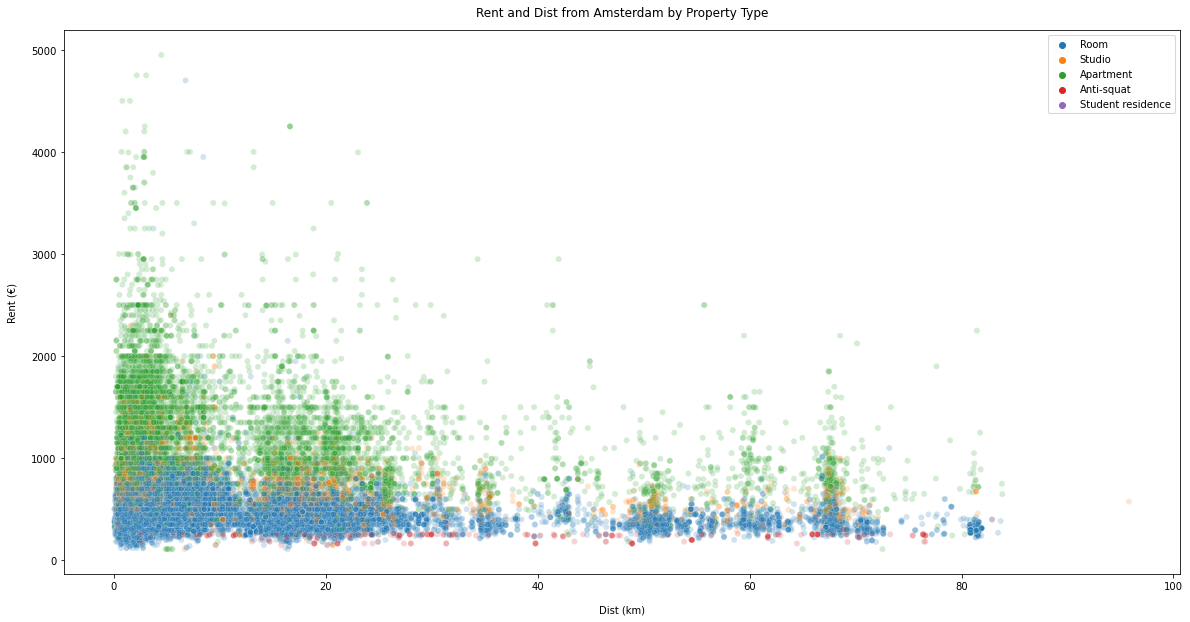

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

sns.scatterplot(y="rent", x="dist_from_nearest_city", data=kdf, hue="propertyType",alpha=0.2)
ax.set_ylabel("Rent (€)", labelpad=14)
ax.set_xlabel("Dist (km)", labelpad=14)
ax.set_title("Rent and Dist from Amsterdam by Property Type", pad=14)
legend = ax.legend()

plt.show()

## check nan and fill data

In [33]:
# nan data percent

kdf.isnull().mean()

areaSqm                   0.000000
furnish                   0.007781
propertyType              0.000000
rent                      0.000000
internet                  0.173867
kitchen                   0.162647
living                    0.182465
matchCapacity             0.000000
pets                      0.000000
smokingInside             0.000000
dist_from_Amsterdam       0.000000
dist_from_Groningen       0.000000
dist_from_Rotterdam       0.000000
dist_from_Enschede        0.000000
dist_from_DenHaag         0.000000
dist_from_Utrecht         0.000000
dist_from_Eindhoven       0.000000
dist_from_Arnhem          0.000000
dist_from_Delft           0.000000
dist_from_Tilburg         0.000000
rent_per_areasqm          0.000000
nearest_city              0.000000
dist_from_nearest_city    0.000000
dtype: float64

In [34]:
#check values

print(f'furnish: {kdf["furnish"].unique()}')
print(f'internet: {kdf["internet"].unique()}')
print(f'kitchen: {kdf["kitchen"].unique()}')
print(f'living: {kdf["living"].unique()}')

furnish: ['Unfurnished' 'Furnished' 'Uncarpeted' nan]
internet: ['Yes' nan 'No']
kitchen: ['Shared' 'Own' nan 'None']
living: ['None' 'Own' 'Shared' nan]


In [35]:
# fill with proper value
kdf = kdf.copy()

kdf['furnish'].replace(np.nan, 'Unfurnished', inplace=True)
kdf["internet"].replace(np.nan, 'No', inplace=True)
kdf["kitchen"].replace(np.nan, 'None', inplace=True)
kdf["living"].replace(np.nan, 'None', inplace=True)

kdf.isnull().mean()

areaSqm                   0.0
furnish                   0.0
propertyType              0.0
rent                      0.0
internet                  0.0
kitchen                   0.0
living                    0.0
matchCapacity             0.0
pets                      0.0
smokingInside             0.0
dist_from_Amsterdam       0.0
dist_from_Groningen       0.0
dist_from_Rotterdam       0.0
dist_from_Enschede        0.0
dist_from_DenHaag         0.0
dist_from_Utrecht         0.0
dist_from_Eindhoven       0.0
dist_from_Arnhem          0.0
dist_from_Delft           0.0
dist_from_Tilburg         0.0
rent_per_areasqm          0.0
nearest_city              0.0
dist_from_nearest_city    0.0
dtype: float64

In [36]:
kdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46524 entries, 0 to 46721
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   areaSqm                 46524 non-null  int64  
 1   furnish                 46524 non-null  object 
 2   propertyType            46524 non-null  object 
 3   rent                    46524 non-null  int64  
 4   internet                46524 non-null  object 
 5   kitchen                 46524 non-null  object 
 6   living                  46524 non-null  object 
 7   matchCapacity           46524 non-null  object 
 8   pets                    46524 non-null  object 
 9   smokingInside           46524 non-null  object 
 10  dist_from_Amsterdam     46524 non-null  float64
 11  dist_from_Groningen     46524 non-null  float64
 12  dist_from_Rotterdam     46524 non-null  float64
 13  dist_from_Enschede      46524 non-null  float64
 14  dist_from_DenHaag       46524 non-null

array([[<AxesSubplot:title={'center':'areaSqm'}>,
        <AxesSubplot:title={'center':'rent'}>,
        <AxesSubplot:title={'center':'dist_from_Amsterdam'}>,
        <AxesSubplot:title={'center':'dist_from_Groningen'}>],
       [<AxesSubplot:title={'center':'dist_from_Rotterdam'}>,
        <AxesSubplot:title={'center':'dist_from_Enschede'}>,
        <AxesSubplot:title={'center':'dist_from_DenHaag'}>,
        <AxesSubplot:title={'center':'dist_from_Utrecht'}>],
       [<AxesSubplot:title={'center':'dist_from_Eindhoven'}>,
        <AxesSubplot:title={'center':'dist_from_Arnhem'}>,
        <AxesSubplot:title={'center':'dist_from_Delft'}>,
        <AxesSubplot:title={'center':'dist_from_Tilburg'}>],
       [<AxesSubplot:title={'center':'rent_per_areasqm'}>,
        <AxesSubplot:title={'center':'dist_from_nearest_city'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

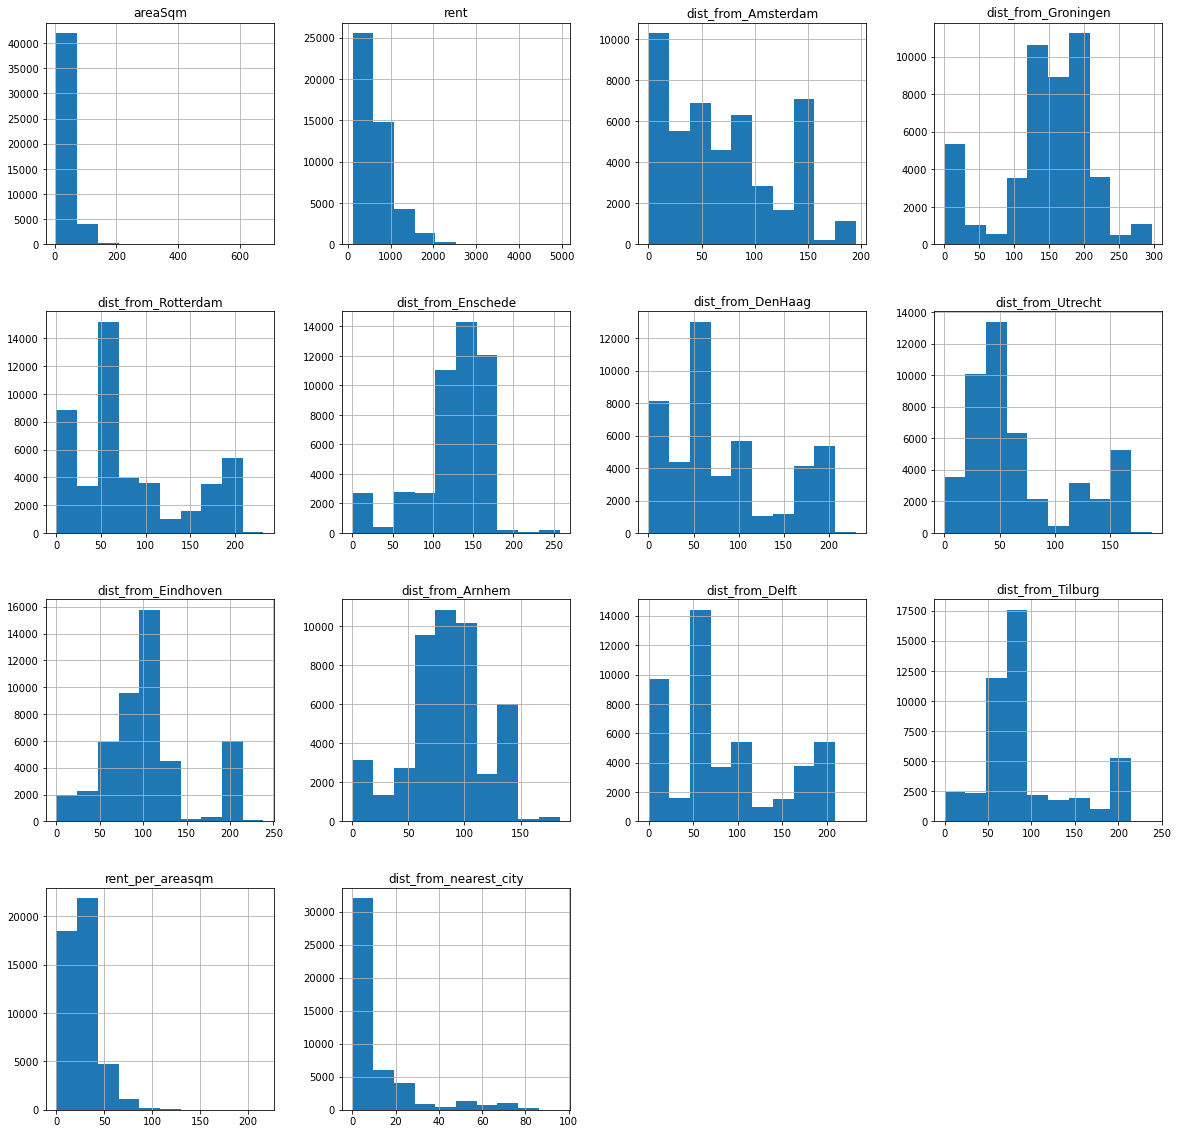

In [98]:
kdf.hist(figsize = (20,20))

## check category cols 

In [99]:
cat_kdf = kdf.select_dtypes(include=['object']).copy()

for col in cat_kdf:
    print(f'---- {col} ----')
    print(kdf[col].value_counts())
    print('\n')


---- furnish ----
Furnished      20858
Unfurnished    19211
Uncarpeted      6093
Name: furnish, dtype: int64


---- propertyType ----
Room                 30370
Apartment            11746
Studio                4079
Anti-squat             324
Student residence        5
Name: propertyType, dtype: int64


---- internet ----
Yes    35604
No      2831
Name: internet, dtype: int64


---- kitchen ----
Shared    27563
Own       11124
None        270
Name: kitchen, dtype: int64


---- living ----
Shared    15642
Own       11932
None      10461
Name: living, dtype: int64


---- matchCapacity ----
1 person         30857
2 persons        10255
Not important     2764
3 persons         1084
4 persons          872
> 5 persons        384
5 persons          308
Name: matchCapacity, dtype: int64


---- pets ----
No                     42609
By mutual agreement     1979
Yes                     1936
Name: pets, dtype: int64


---- smokingInside ----
No               39620
Yes               3614
Not import

In [100]:
# check data by property type

kdf.groupby('propertyType').mean()

,areaSqm,rent,dist_from_Amsterdam,dist_from_Groningen,dist_from_Rotterdam,dist_from_Enschede,dist_from_DenHaag,dist_from_Utrecht,dist_from_Eindhoven,dist_from_Arnhem,dist_from_Delft,dist_from_Tilburg,rent_per_areasqm,dist_from_nearest_city
propertyType,,,,,,,,,,,,,,
Anti-squat,56.533951,288.296296,112.118236,152.481847,119.407223,112.539739,127.607987,97.004769,99.419072,84.921792,125.207523,103.568463,7.498038,32.635197
Apartment,68.667972,1145.195811,65.551383,149.603925,78.558006,127.138606,81.464298,63.026221,100.279624,82.166376,81.156995,89.540272,18.490111,11.088373
Room,17.136813,481.263648,70.085116,145.840662,82.170611,125.790261,84.547239,68.097094,107.185353,86.181898,84.124347,95.880481,32.262214,11.074392
Student residence,11.400000,396.000000,62.745902,146.981473,62.528316,147.164579,64.488271,64.345569,115.129559,100.625914,62.716179,94.124520,34.616667,9.169937
Studio,29.998774,717.017161,73.041167,147.341048,84.191205,126.485083,88.422527,67.484094,100.503300,83.813043,87.542330,90.788479,26.152721,11.346128


In [101]:
# remove small city

# smallcities = kdf[kdf.groupby(['city'])['city'].transform('count') < 5]['city'].tolist()
# print('list', len(smallcities))
# print('pre shape', kdf.shape)

# kdf = kdf[~kdf.city.isin(smallcities)]
# kdf.shape

# print('post shape', df.shape)


Student residence is too small and Anti-squat is temporary outliner price so remove.

In [102]:
# remove student residence and Anti-squat
kdf = kdf[~kdf.propertyType.isin(['Student residence', 'Anti-squat'])]

# Create Model 

In [103]:
## create dummy

def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df


In [104]:
ddf = create_dummy_df(kdf, cat_kdf, dummy_na=False) 
ddf.head()

,areaSqm,rent,dist_from_Amsterdam,dist_from_Groningen,dist_from_Rotterdam,dist_from_Enschede,dist_from_DenHaag,dist_from_Utrecht,dist_from_Eindhoven,dist_from_Arnhem,dist_from_Delft,dist_from_Tilburg,rent_per_areasqm,dist_from_nearest_city,furnish_Uncarpeted,furnish_Unfurnished,propertyType_Room,propertyType_Studio,internet_Yes,kitchen_Own,kitchen_Shared,living_Own,living_Shared,matchCapacity_2 persons,matchCapacity_3 persons,matchCapacity_4 persons,matchCapacity_5 persons,matchCapacity_> 5 persons,matchCapacity_Not important,pets_No,pets_Yes,smokingInside_Not important,smokingInside_Yes
0,14,500,59.637208,201.250465,4.465219,166.196941,24.314172,46.031858,83.337175,95.456832,16.448426,53.959307,35.714286,4.465219,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,30,950,1.624923,144.666405,58.256222,134.790383,51.769372,33.748011,109.837850,79.406393,55.733945,90.630650,31.666667,1.624923,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0
2,11,1000,4.352933,149.459721,54.126682,139.031203,46.936372,33.848170,109.516849,82.149140,51.114793,89.172799,90.909091,4.352933,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1
3,16,290,132.230968,21.953365,186.211090,90.689366,183.236695,141.946528,189.355153,122.799328,186.380767,190.220521,18.125000,21.953365,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1
4,22,475,57.210630,199.974032,1.120927,167.664778,19.616407,46.510057,87.703769,97.503210,11.858820,58.501428,21.590909,1.120927,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0


## Cteate Model

## Model1 targert = rent_per_areasqm
y = rent_per_areasqm

In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

#Split into explanatory and response variables
X = ddf.drop('rent_per_areasqm', axis=1)
y = ddf['rent_per_areasqm']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=True)

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

#Score using your model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

print('test_score:', test_score,  'train_score:', train_score)


test_score: 0.5939187884914159 train_score: 0.5783335349053842


In [106]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = coefficients
    coefs_df['abs_coefs'] = np.abs(coefficients)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)
coef_df.head(30)

,est_int,coefs,abs_coefs
15,propertyType_Room,4.864491,4.864491
21,living_Shared,4.578505,4.578505
16,propertyType_Studio,2.591980,2.591980
13,furnish_Uncarpeted,-2.465670,2.465670
20,living_Own,-2.192782,2.192782
26,matchCapacity_> 5 persons,-1.547035,1.547035
24,matchCapacity_4 persons,1.061955,1.061955
14,furnish_Unfurnished,-0.959517,0.959517
25,matchCapacity_5 persons,-0.775252,0.775252
19,kitchen_Shared,0.717234,0.717234


In [107]:
#not_city_coef = coef_df[~coef_df['est_int'].str.startswith('city_')]
#not_city_coef

In [108]:
dist_from_coef = coef_df[coef_df["est_int"].str.startswith('dist_from_')]
dist_from_coef

,est_int,coefs,abs_coefs
10,dist_from_Delft,0.443225,0.443225
4,dist_from_Rotterdam,-0.253989,0.253989
2,dist_from_Amsterdam,-0.166817,0.166817
6,dist_from_DenHaag,-0.142822,0.142822
11,dist_from_Tilburg,0.065598,0.065598
7,dist_from_Utrecht,0.064962,0.064962
8,dist_from_Eindhoven,-0.064104,0.064104
12,dist_from_nearest_city,-0.059184,0.059184
5,dist_from_Enschede,0.030467,0.030467
3,dist_from_Groningen,0.024885,0.024885


## Model2 targert = rent 
y = rent

In [109]:
#Split into explanatory and response variables
X2 = ddf.drop('rent', axis=1)
y2 = ddf['rent']

#Split into train and test
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=True)

lm_model2 = LinearRegression(normalize=True) # Instantiate
lm_model2.fit(X2_train, y2_train) #Fit

#Predict using your model
y2_test_preds = lm_model2.predict(X2_test)
y2_train_preds = lm_model2.predict(X2_train)

#Score using your model
test2_score = r2_score(y2_test, y2_test_preds)
train2_score = r2_score(y2_train, y2_train_preds)

print('test_score:', test2_score,  'train_score:', train2_score)


test_score: 0.7971492005878735 train_score: 0.7857147695915018


In [110]:
coef_df2 = coef_weights(lm_model2.coef_, X2_train)
coef_df2.head(30)

,est_int,coefs,abs_coefs
15,propertyType_Room,-202.827684,202.827684
22,matchCapacity_2 persons,90.288478,90.288478
16,propertyType_Studio,-81.161525,81.161525
23,matchCapacity_3 persons,78.270019,78.270019
25,matchCapacity_5 persons,78.139109,78.139109
24,matchCapacity_4 persons,51.108088,51.108088
19,kitchen_Shared,-43.882635,43.882635
13,furnish_Uncarpeted,-42.132672,42.132672
14,furnish_Unfurnished,-35.256588,35.256588
26,matchCapacity_> 5 persons,31.661908,31.661908


In [111]:
dist_from_coef2 = coef_df2[coef_df2["est_int"].str.startswith('dist_from_')]
dist_from_coef2

,est_int,coefs,abs_coefs
9,dist_from_Delft,6.517831,6.517831
1,dist_from_Amsterdam,-3.401908,3.401908
3,dist_from_Rotterdam,-3.205578,3.205578
12,dist_from_nearest_city,-2.830565,2.830565
5,dist_from_DenHaag,-1.474111,1.474111
2,dist_from_Groningen,1.463019,1.463019
10,dist_from_Tilburg,1.413359,1.413359
8,dist_from_Arnhem,0.729889,0.729889
4,dist_from_Enschede,0.645167,0.645167
7,dist_from_Eindhoven,-0.450409,0.450409
